In [1]:
import pandas as pd
import seaborn as sns

In [52]:
folders = ['/bradesco', '/itau', '/nubank', '/inter', '/bancodobrasil', '/next']
filenames = ['/bradesco-', '/itau-', '/nubank-', '/inter-', '/bb-', '/next-']
months = [('oct', 2019), ('nov', 2019), ('dec', 2019), ('jan', 2020), ('feb', 2020), ('mar', 2020), ('apr', 2020), ('may', 2020)]

In [53]:
#itau jan

df = pd.DataFrame()
cont = 0
for fol, fn in zip(folders, filenames):
    for m in months:
        df_aux = pd.read_csv('data' + fol + fn + str(m[0]) + str(m[1]) + '.csv', index_col =0)
        df_aux['bank'] = fol.replace('/','')
        df = df.append(df_aux)
   
    
    cont = cont + 1
    if(cont==5):
        break
df.reset_index(drop = True, inplace = True)

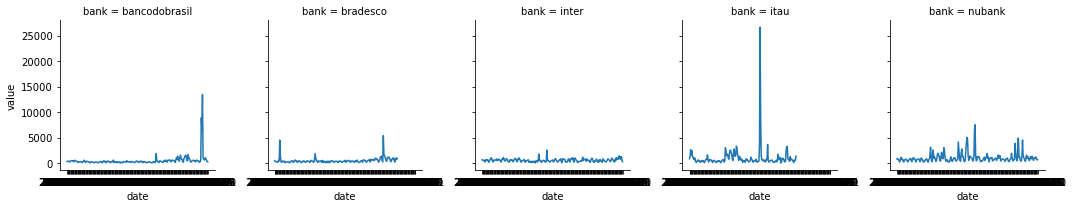

In [55]:
df_g = df.groupby(['date', 'bank']).size()
df_g = pd.DataFrame(df_g).reset_index()
df_g.columns = ['date', 'bank', 'value']
#sns.lineplot(x="date", y="value",  hue="bank",  data=df_g)

g = sns.FacetGrid(df_g, col="bank")
g.map(sns.lineplot, "date", "value")

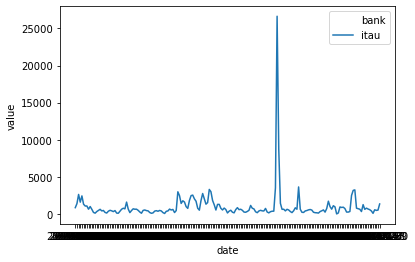

In [70]:
sns.lineplot(x="date", y="value",  hue="bank",  data=df_g[df_g.bank == 'itau'])

In [95]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np


# plotly setup]
fig = go.Figure()

# Add one ore more traces
for b in folders:
    bank = b.replace('/', '')
    fig = px.line(x=df_g[df_g.bank == bank].date, y=df_g[df_g.bank == bank].value)


#fig.add_traces(go.Scatter(x=x, y=values_1b))
# construct menus
'''updatemenus = [{'buttons': [{'method': 'update',
                             'label': 'Val 1',
                             'args': [{'y': [df_g[df_g.bank == 'bradesco'].value, df_g[df_g.bank == 'itau'].value]},]
                              },
                            
                            {'method': 'update',
                             'label': 'Val 2',
                             'args': [{'y': [df_g[df_g.bank == 'nubank'].value]},]}],
                'direction': 'down',
                'showactive': True,}]'''

# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)
fig.show()

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

In [90]:
df_g[df_g.bank == 'itau']

,date,bank,value
0,2019-10-01,bancodobrasil,293
1,2019-10-01,bradesco,435
2,2019-10-01,inter,645
3,2019-10-01,itau,849
4,2019-10-01,nubank,802
...,...,...,...
1125,2020-05-30,inter,425
1126,2020-05-30,nubank,613
1127,2020-05-31,bancodobrasil,244
1128,2020-05-31,inter,262


In [96]:
fig = px.line(x=df_g[df_g.bank == 'itau'].date, y=df_g[df_g.bank == 'itau'].value)
fig.show()

In [11]:
df = pd.read_csv('data/nubank/nubank-dez2019.csv', index_col =0)

In [12]:
df

,date,text
0,2019-12-31,Esses dias eu achei um cartão na rua do @nuban...
1,2019-12-31,"Como a #MegaDaVirada flopou, agora é aguardar ..."
2,2019-12-31,"Poh @nubank 6 meses usando a conta, pagando 15..."
3,2019-12-31,Gostei da intimidade kkkkkkk aumenta meu limite.
4,2019-12-31,Resumo dos pedidos com maior número de ocorrên...
...,...,...
33140,2019-12-01,Trabalhar mais na produção de conteúdos didáti...
33141,2019-12-01,1 - A culpa foram dos bancos tradicionais como...
33142,2019-12-01,sem falar que sou cliente há mais de um ano e ...
33143,2019-12-01,@nubank Migrem para o melhor. Sem taxas Seu di...
